# Time Series Basic Analysis

## 1. Summary

Objective of this notebook is the present the basic concepts of a time series and evaluate them with practical use cases. 

### 1.1 Why this matter?
This concept is especially important for refrigerator log analysis because temperature sensors sampled troughout a long time, is nothing more than a time series. So understanding well the basic concepts or parts of a time series can generate multiple insights and understanding of a refrigerator product

### 1.2 Reference
This material is a summary of:
- [Intel Time Series Analysis Course](https://www.intel.com/content/www/us/en/developer/learn/course-time-series-analysis.html)
- Book - [Forecasting: Principles and Practice, Rob J Hyndman](https://otexts.com/fpp2/index.html) 

***
## 2. Setup

Run the below code to import all the necessary libraries to run the following codes

In [3]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import random

%matplotlib widget

#Create an interval from 0 up to 5 sine periods, with step of 0.1
sin_period = 2*math.pi
sample_period = 0.1
samples_in_period = sin_period/sample_period

***
## 3. Time Series

A time series can be thought of as a list of numbers, along with some information about what times those numbers were recorded.

### 3.1 Components of a time series

#### 3.1.1 Theory

**Trend:**
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. There is a trend in the antidiabetic drug sales data shown in Figure 2.2.

**Seasonal:**
A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency. The monthly sales of antidiabetic drugs above shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

**Cyclic:**
A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years. Usually this component is presented as a variation of the trend.

**Noise:**
If the time series shows no autocorrelation they are called white noise

Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of a fixed frequency then they are cyclic; if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal

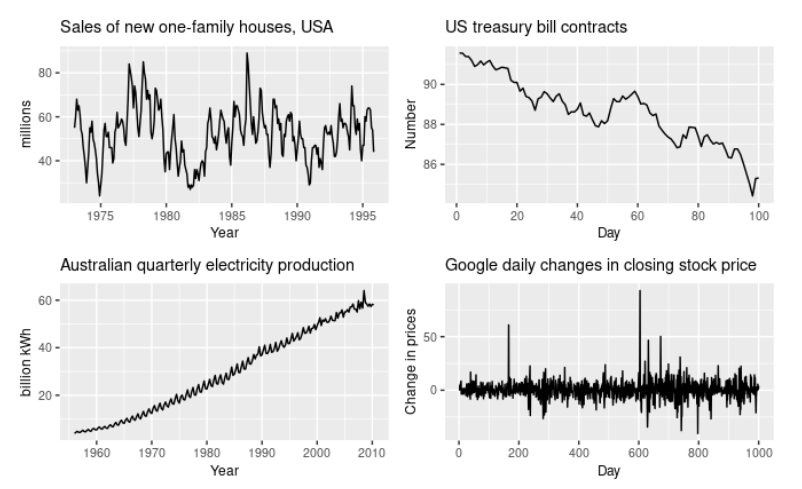

For the above image
- The monthly housing sales (top left) show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.
- The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.
- The Australian quarterly electricity production (bottom left) shows a strong increasing trend, with strong seasonality. There is no evidence of any cyclic behaviour here.
- The daily change in the Google closing stock price (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a forecasting model.


#### 3.1.2 Practice

Of course, even a very simple line chart is a time series, as well as a simple sine. Below is an example code for building a very simple signal that represents a time series with it's main components.

For better undestanding, it's recommended that you tweak TREND_FACTOR, SEASONAL_FACTOR, NOISE_FACTOR values to observe how the signal will look like

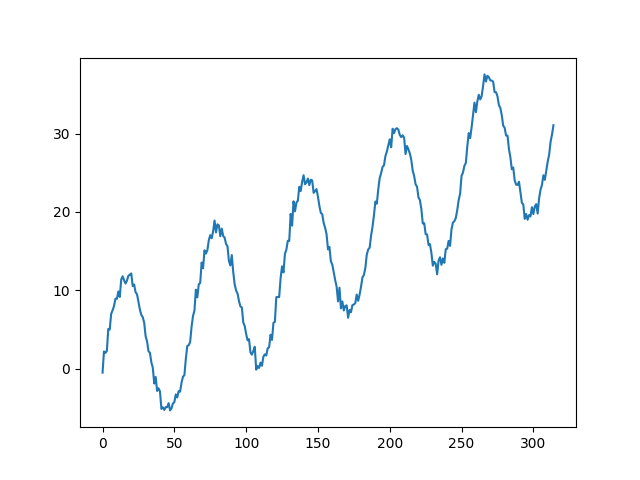

In [4]:
def Create_TimeSeries(trend,seasonal,noise,freq=1):
    """
    Create a time series containing Trend, Season and Noise

    Parameters:
        trend (int or float): value to multiply the time to create the trend component
        seasonal (int or float): value to multiply the sin function to create the seasonal component
        noise (int or float): value to multiply the standard deviation of the Gaussian distribution to create the noise component
        optional: freq (int or float): frequency to multiply the time for the sin function to create the seasonal component, defaults to 1

    Returns:
    ndarray: time series generated with trend, seasonal and noise components

    """
    time = np.arange(0, sin_period*5 , sample_period)
    
    trend = trend * time 

    seasonal = SEASONAL_FACTOR * np.sin(freq*time)

    np.random.seed(10)
    residual = []
    for val in range(len(time)):
        residual.append(random.gauss(0, NOISE_FACTOR/3)) #99% of the values will be between +NOISE_FACTOR and -NOISE_FACTOR, due to 6sigma


    time_series = trend + seasonal + residual

    return time_series


#Tweak the below values to observe different time series formations
TREND_FACTOR = 1
SEASONAL_FACTOR = 10
NOISE_FACTOR = 2

time_series = Create_TimeSeries(TREND_FACTOR,SEASONAL_FACTOR,NOISE_FACTOR)


plt.figure()
plt.plot(time_series)
plt.show()

### 3.2 Autocorrelation
Just as correlation measures the extent of a linear relationship between two variables, **autocorrelation measures the linear relationship between lagged values of a time series**. Of course that this is a critical topic when discussing time series, as the previous value of the time series in many cases has a correlation with the current value.

Below is a typical plot of the ACF (AutoCorrelation Function):

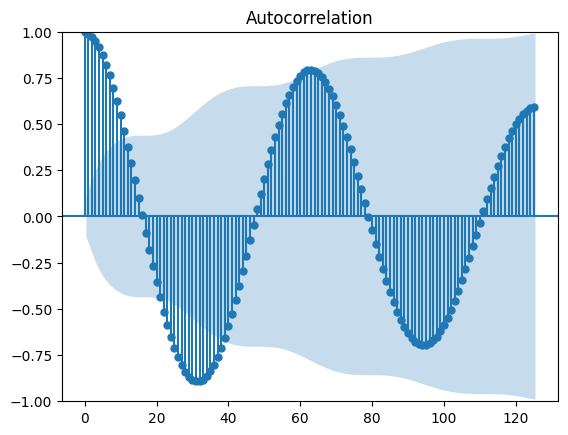

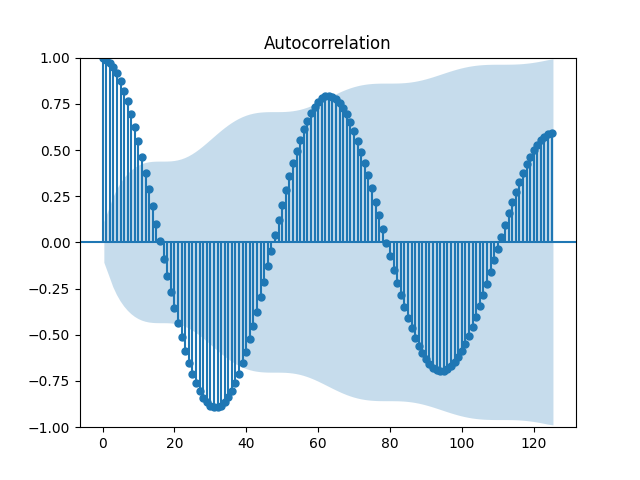

In [38]:
seasonal_time_series = Create_TimeSeries(0,10,0)
plot_acf(seasonal_time_series, lags= (samples_in_period*2) )    #Plot ACF for last N values, where N is the equivalent of the amount of samples for 2 periods

When plotting the above ACF of the Seasonal part of a time series, you should have observed:
- Values below the shaded blue area are correlations of low significance
- There is a high correlation on the lag N = 62
- This make sense, since at 62 samples, when each sample is collected every 0.1s means that there is a highe correlation at 6.2 seconds, which is exactly the period of a sine wave (2*PI)
- As lags increase, the shaded area increases and the corerlations decrease, this is also natural, as the farther away the value, the weakest will be the correlation and it's significance


This is analyses is interesting as it provides a numerical factor of how much there is correlation between lags.

This analysis seems to be trivial and obvious, since sine has an easy and clear period. But ACF is relevant also in more complex signals that contain multiple frequencies, like the example below:

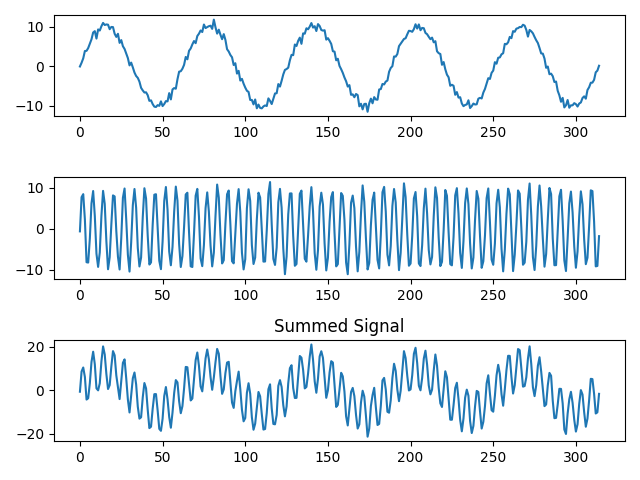

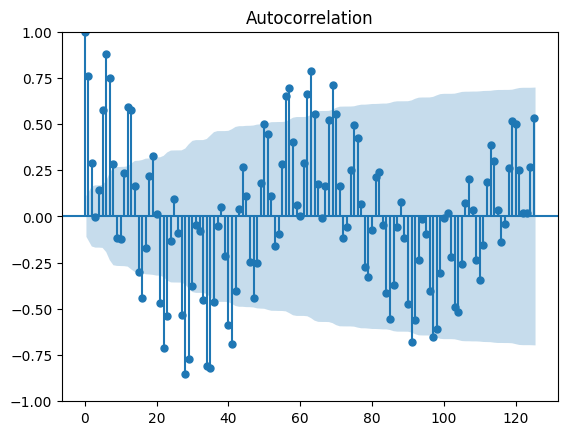

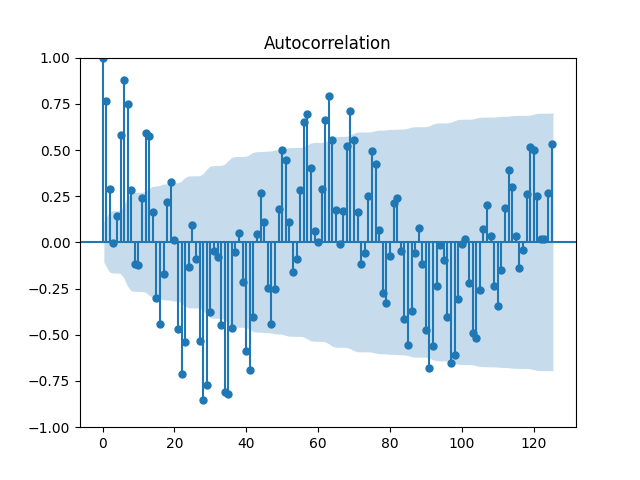

In [41]:
seasonal_1 = Create_TimeSeries(0,1,0)
seasonal_2 = Create_TimeSeries(0,5,0,10)    #create a higher Frequency
multi_seasonal_signal = seasonal_1 + seasonal_2


fig,axs = plt.subplots(3)
axs[0].plot(seasonal_1)
axs[1].plot(seasonal_2)
axs[2].plot(multi_seasonal_signal)
axs[2].set_title("Summed Signal")
plt.tight_layout()
plt.show()

plot_acf(multi_seasonal_signal, lags= (samples_in_period*2) )    #Plot ACF for last N values, where N is the equivalent of the amount of samples for 2 periods

Depending on your values of Trend, Seasonality and Noise, you can also observe that the ACF plot might also loose some of it's useful analysis, like for example if the magnitude of the trend is too large compared to the seasonal part

c:\Users\GRANDJ3\Desktop\dev\Diagnostics\AppliedML-Refrigerator_Fault_Detection\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


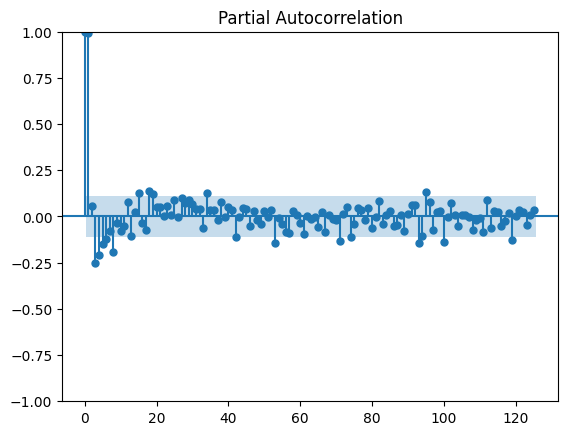

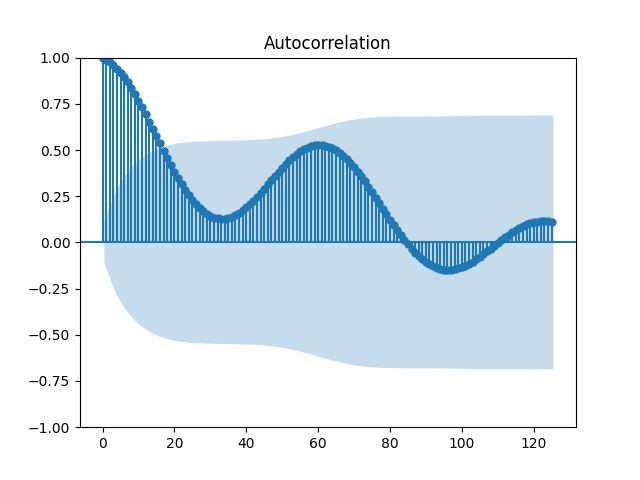

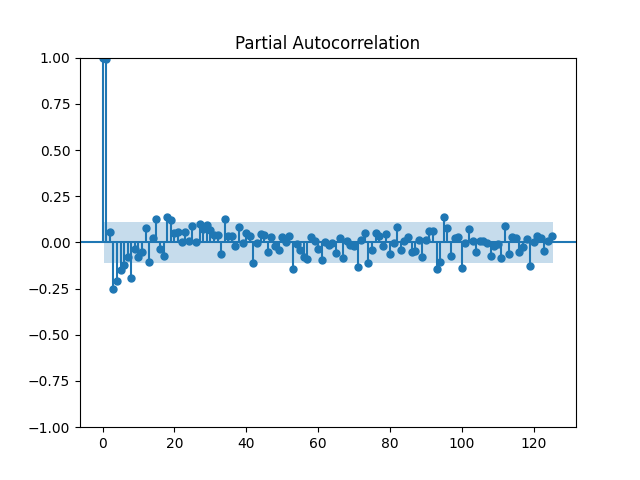

In [5]:
plot_acf(time_series, lags= (samples_in_period*2) )    #Plot ACF for last N values, where N is the equivalent of the amount of samples for 2 periods
plot_pacf(time_series, lags= (samples_in_period*2) )    #Plot ACF for last N values, where N is the equivalent of the amount of samples for 2 periods

### 3.3 Decomposing a time series

Of course, the same way that we can compose a time series based on Trend, Seasonality and reminder, we can also decompose such time series back to it's main components

c:\Users\GRANDJ3\Desktop\dev\Diagnostics\AppliedML-Refrigerator_Fault_Detection\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


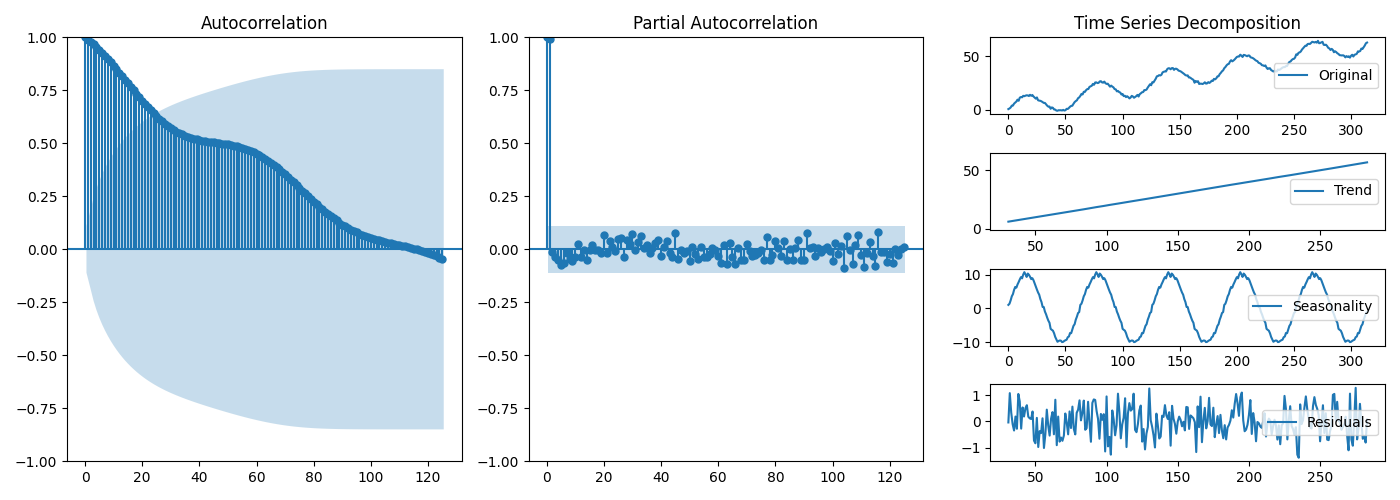

In [24]:

def plot_seasonality_charts(temperature_value,period,title = ""):
    
    data = temperature_value
    decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=round(period))
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fig = plt.figure(figsize=(14, 5))
    if (title != ""): fig.suptitle(title)
    gs = fig.add_gridspec(4,3)
    axacf = fig.add_subplot(gs[:, 0])
    axpacf = fig.add_subplot(gs[:, 1])
    ax1 = fig.add_subplot(gs[0, 2])
    ax2 = fig.add_subplot(gs[1, 2])
    ax3 = fig.add_subplot(gs[2, 2])
    ax4 = fig.add_subplot(gs[3, 2])

    plot_acf(data, lags=period*2,ax=axacf)
    plot_pacf(data, lags=period*2,ax=axpacf)

    ax1.set_title("Time Series Decomposition")
    ax1.plot(data, label='Original')
    ax1.legend(loc='right')

    ax2.plot(trend, label='Trend')
    ax2.set_ylim(min(temperature_value),max(temperature_value))
    ax2.legend(loc='right')

    ax3.plot(seasonal, label='Seasonality')
    ax3.legend(loc='right')

    ax4.plot(residual, label='Residuals')
    ax4.legend(loc='right')

    fig.tight_layout()
    plt.show()


# Plot the charts that help understand a 
plot_seasonality_charts(time_series,sin_period/0.1)